In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Raman\Downloads\data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:
len(df)

569

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

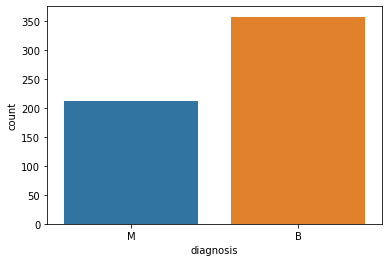

In [9]:
sns.countplot(x='diagnosis',data = df) 

In [15]:
df["diagnosis"] = pd.Categorical(df["diagnosis"]).codes

In [16]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

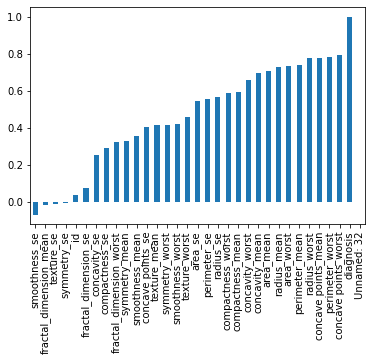

In [18]:
df.corr()['diagnosis'].sort_values().plot(kind = 'bar')

In [20]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

<AxesSubplot:>

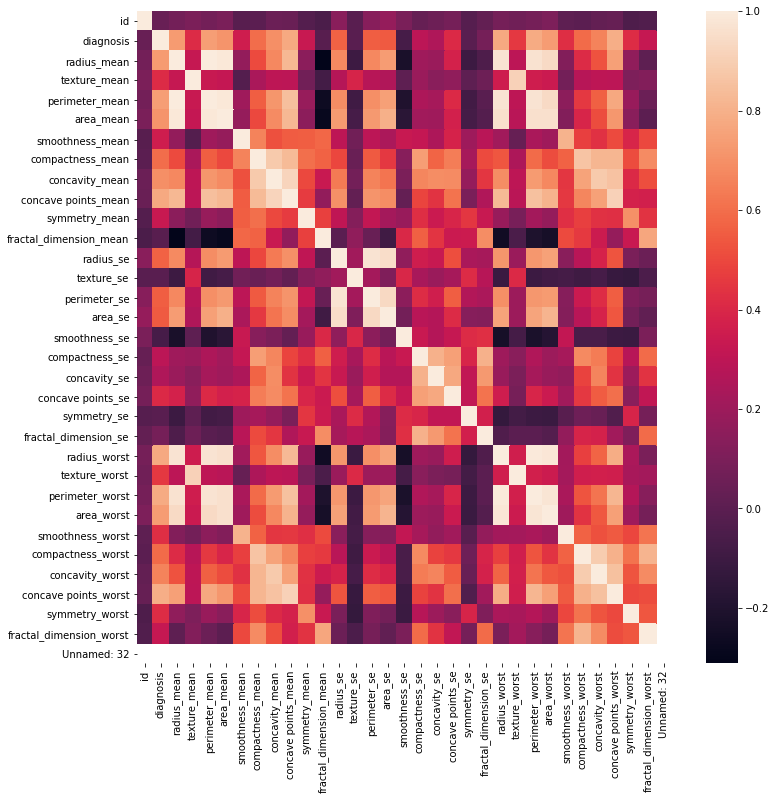

In [24]:
plt.figure(figsize= (12,12))
sns.heatmap(df.corr())

In [33]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [39]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [34]:
X = df.drop(['diagnosis', 'Unnamed: 32'] , axis = 1).values
Y = df['diagnosis']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [36]:
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size = 0.3)

In [37]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout


In [68]:
x_train.shape

(398, 31)

In [69]:
model = Sequential()
model.add(Dense(30 , activation = 'relu'))
model.add(Dense(15 , activation = 'relu'))
#Binary_Classifictaion
model.add(Dense(1 , activation = 'sigmoid'))
model.compile(
  loss = 'binary_crossentropy' , optimizer = 'adam'
)

In [70]:
model.fit(x_train,y_train , validation_data=(x_test , y_test) , epochs= 600)

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.6972 - val_loss: 0.6788
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6599 - val_loss: 0.6499
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6352 - val_loss: 0.6230
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6090 - val_loss: 0.5927
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5769 - val_loss: 0.5564
Epoch 6/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5401 - val_loss: 0.5143
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4976 - val_loss: 0.4684
Epoch 8/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4498 - val_loss: 0.4194
Epoch 9/600
13/13 [==============================] - 0s 2ms/step - loss: 0.4045 - val_loss: 0.3769
Epoch 10/600
13/13 [==============================] - 0s 2ms/step - loss: 0.3652 - val_loss: 0.3415
Epoch 11

In [71]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

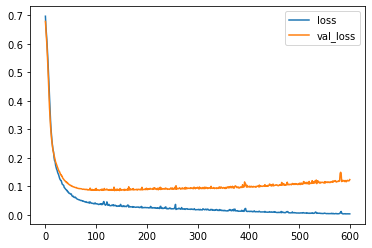

In [72]:
losses.plot()

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
prediction = model.predict_classes(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.94      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



MODEL IS OVERFITTING

lets try with EarlyStopping

In [75]:
model = Sequential()


model.add(Dense(30 , activation = 'relu'))

model.add(Dense(15 , activation = 'relu'))

#Binary_Classifictaion
model.add(Dense(1 , activation = 'sigmoid'))


model.compile(
  loss = 'binary_crossentropy' , optimizer = 'adam'
)

In [76]:
from keras.callbacks import EarlyStopping

In [77]:
callback = EarlyStopping(monitor= 'val_loss', mode = 'auto' , verbose = 1 , patience = 25)

In [78]:
model.fit(x_train,y_train , validation_data=(x_test , y_test) , epochs= 600 , callbacks= [callback])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6795 - val_loss: 0.6649
Epoch 2/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6556 - val_loss: 0.6379
Epoch 3/600
13/13 [==============================] - ETA: 0s - loss: 0.640 - 0s 2ms/step - loss: 0.6278 - val_loss: 0.6063
Epoch 4/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5924 - val_loss: 0.5662
Epoch 5/600
13/13 [==============================] - 0s 2ms/step - loss: 0.5469 - val_loss: 0.5200
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5005 - val_loss: 0.4725
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4538 - val_loss: 0.4269
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.4048 - val_loss: 0.3812
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3618 - val_loss: 0.3413
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.3253 - v

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

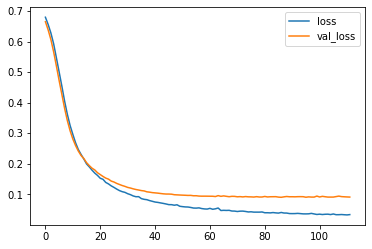

In [79]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
loss.plot()

In [80]:
prediction = model.predict_classes(x_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.98      0.94      0.96        66

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<div class="burk">
Adding Dropout Layers</div><i class="fa fa-lightbulb-o "></i>

In [81]:
model = Sequential()


model.add(Dense(30 , activation = 'relu'))

#shutdown half neurons
model.add(Dropout(0.5))

model.add(Dense(15 , activation = 'relu'))

model.add(Dropout(0.5))

#Binary_Classifictaion
model.add(Dense(1 , activation = 'sigmoid'))


model.compile(
  loss = 'binary_crossentropy' , optimizer = 'adam'
)

In [82]:
model.fit(x_train,y_train , validation_data=(x_test , y_test) , epochs= 600 , callbacks= [callback])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.7165 - val_loss: 0.6827
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6631
Epoch 3/600
13/13 [==============================] - 0s 2ms/step - loss: 0.6691 - val_loss: 0.6488
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6684 - val_loss: 0.6347
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6426 - val_loss: 0.6157
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6194 - val_loss: 0.5915
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5923 - val_loss: 0.5632
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5660 - val_loss: 0.5314
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5553 - val_loss: 0.4996
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5355 - val_loss: 0.4702
Epoch 11

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

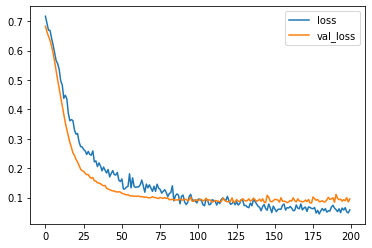

In [83]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(10,10))
loss.plot()

In [84]:
prediction = model.predict_classes(x_test)

In [85]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       105
           1       1.00      0.94      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

